http://xarray.pydata.org/en/stable/quick-overview.html

In [24]:
import numpy as np
import pandas as pd
import xarray as xr
%matplotlib inline

You can make a DataArray from scratch by supplying data in the form of a numpy array or list, with optional dimensions and coordinates:

In [3]:
data = xr.DataArray(np.random.randn(2, 3),
                    dims=('x', 'y'),
                    coords={'x': [10, 20]})

In [4]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.700715,  0.51122 , -0.305892],
       [ 1.083819, -1.467816,  0.798526]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [6]:
data.values

array([[ 0.70071538,  0.51121972, -0.30589208],
       [ 1.08381935, -1.46781552,  0.79852624]])

In [7]:
data.dims

('x', 'y')

In [8]:
data.coords

Coordinates:
  * x        (x) int64 10 20

If you supply a pandas Series or DataFrame, metadata is copied directly:

In [5]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Indexing
xarray supports four kind of indexing. Since we have assigned coordinate labels to the x dimension we can use label-based indexing along that dimension just like pandas. The four examples below all yield the same result but at varying levels of convenience and intuitiveness.

In [11]:
# positional and by integer label, like numpy
data[[0, 1]]

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.700715,  0.51122 , -0.305892],
       [ 1.083819, -1.467816,  0.798526]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [12]:
# positional and by coordinate label, like pandas
data.loc[10:20]

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.700715,  0.51122 , -0.305892],
       [ 1.083819, -1.467816,  0.798526]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [13]:
# by dimension name and integer label
data.isel(x=slice(2))

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.700715,  0.51122 , -0.305892],
       [ 1.083819, -1.467816,  0.798526]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [14]:
# by dimension name and coordinate label
data.sel(x=[10, 20])

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.700715,  0.51122 , -0.305892],
       [ 1.083819, -1.467816,  0.798526]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [15]:
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 0.700715,  0.51122 , -0.305892])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

label-based indexing frees us from having to know how our array is organized. All we need to know are the dimension name and the label we wish to index

## Attributes
While you’re setting up your DataArray, it’s often a good idea to set metadata attributes. A useful choice is to set `data.attrs['long_name']` and `data.attrs['units']` since xarray will use these

In [17]:
data.attrs['long_name'] = 'random velocity'

In [18]:
data.attrs['units'] = 'metres/sec'

In [19]:
data.attrs

OrderedDict([('long_name', 'random velocity'), ('units', 'metres/sec')])

In [20]:
# you can add metadata to coordinates too
data.x.attrs['units'] = 'x units'

## Computation
Data arrays work very similarly to numpy ndarrays:

In [21]:
data.sum()

<xarray.DataArray ()>
array(1.320573)

However, aggregation operations can use dimension names instead of axis numbers:

In [22]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([ 0.892267, -0.478298,  0.246317])
Dimensions without coordinates: y

## Plotting

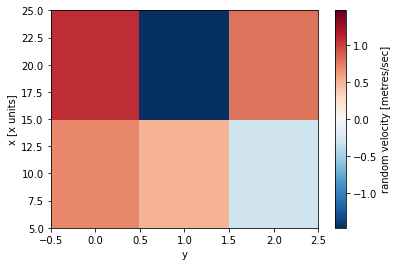

In [25]:
data.plot();

## pandas
Xarray objects can be easily converted to and from pandas objects using the `to_series()`, `to_dataframe()` and `to_xarray()` methods:

In [26]:
data.to_series()

x   y
10  0    0.700715
    1    0.511220
    2   -0.305892
20  0    1.083819
    1   -1.467816
    2    0.798526
dtype: float64

## Datasets
xarray.Dataset is a dict-like container of aligned DataArray objects. You can think of it as a multi-dimensional generalization of the pandas.DataFrame:

In [27]:
ds = xr.Dataset({'foo': data, 'bar': ('x', [1, 2]), 'baz': np.pi})

In [28]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.7007 0.5112 -0.3059 1.084 -1.468 0.7985
    bar      (x) int64 1 2
    baz      float64 3.142

This creates a dataset with three DataArrays named foo, bar and baz. Use dictionary or dot indexing to pull out Dataset variables as DataArray objects but note that assignment only works with dictionary indexing:

In [29]:
ds['foo']

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.700715,  0.51122 , -0.305892],
       [ 1.083819, -1.467816,  0.798526]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:  random velocity
    units:      metres/sec

## Read & write netCDF files
NetCDF is the recommended file format for xarray objects. Users from the geosciences will recognize that the Dataset data model looks very similar to a netCDF file (which, in fact, inspired it).

You can directly read and write xarray objects to disk using to_netcdf(), open_dataset() and open_dataarray():

In [30]:
ds.to_netcdf('example.nc')

In [31]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...